# Assignment-2

**Due Date:** 16.11.2022 

---------------------------------------

**Instructor:** Erkut Erdem

**TA:** Sibel Kapan

---------------------------------------

**Student:** Name Surname

**Github Classroom:** https://classroom.github.com/a/G-DSs1pj



## Part I: Theory Questions

Write your answers. You can add a picture or write it as a markdown.

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving b01151e0-7350-4c68-b749-f262d9ce838e.jpeg to b01151e0-7350-4c68-b749-f262d9ce838e.jpeg
Saving fef5de9f-8b50-454c-8d7d-064659557759.jpeg to fef5de9f-8b50-454c-8d7d-064659557759.jpeg


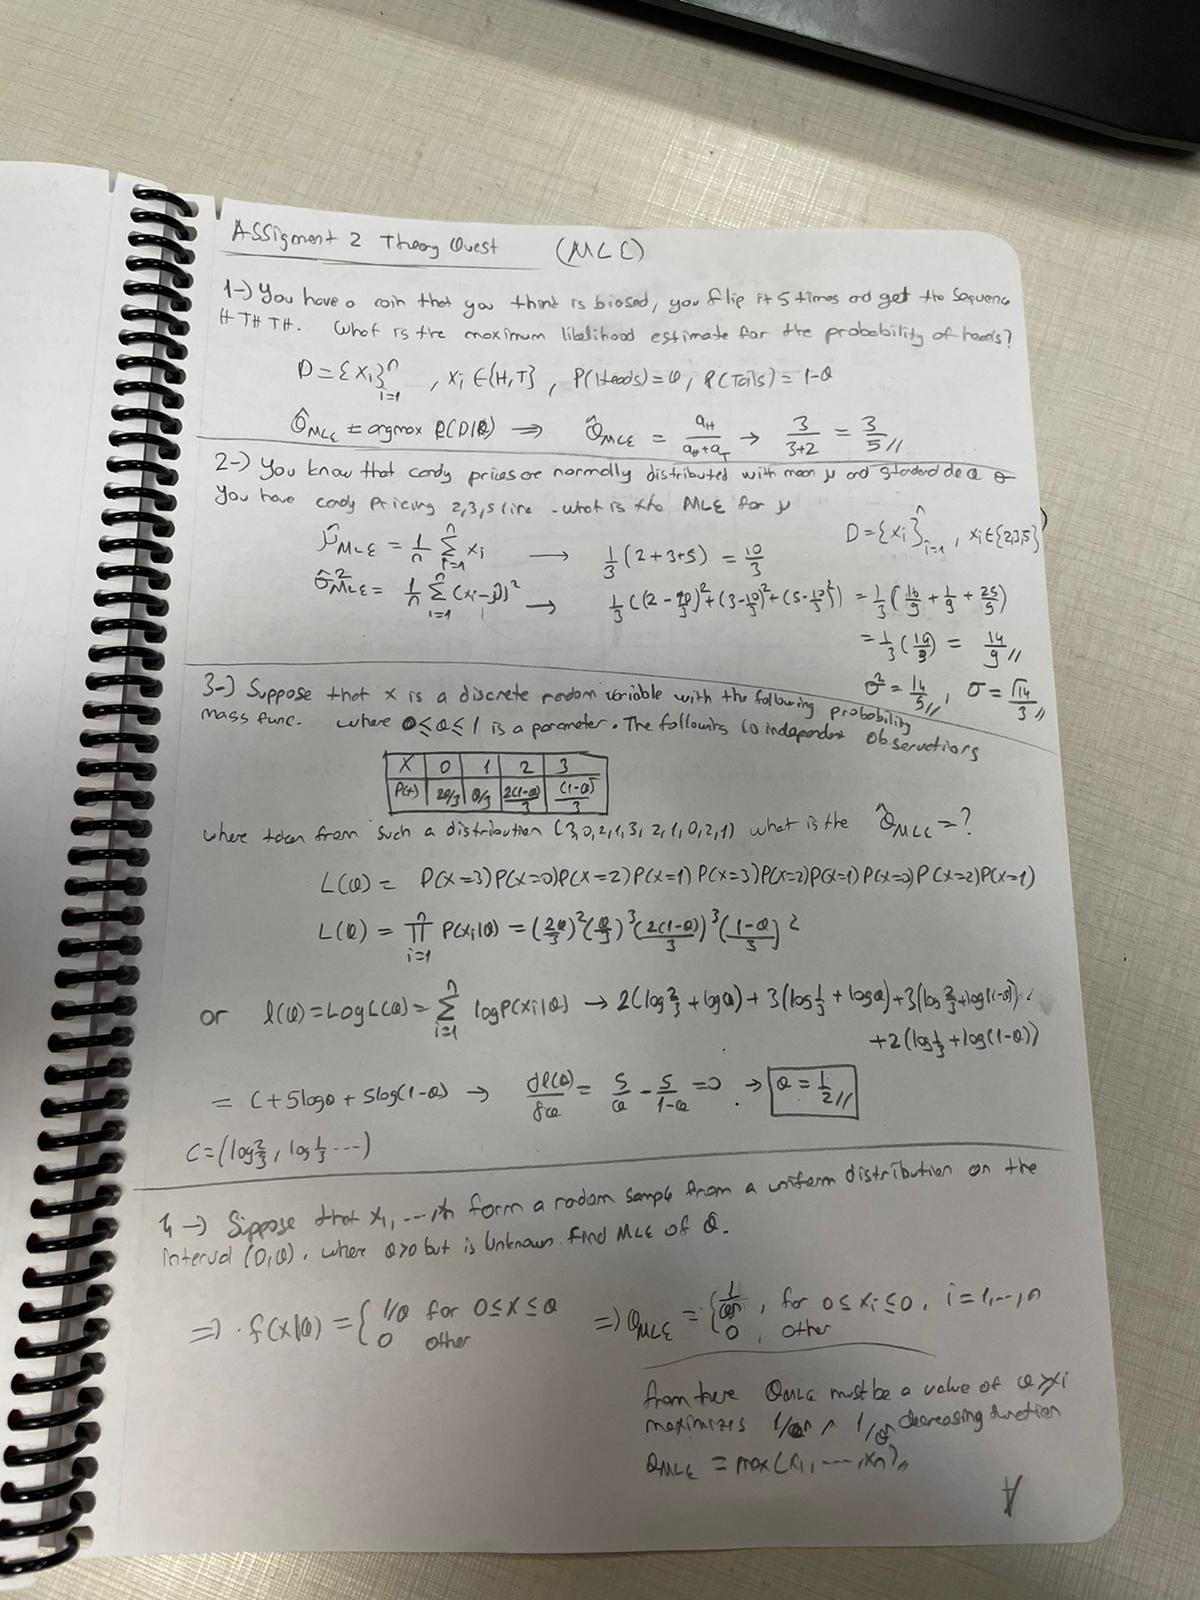

In [ ]:
Image("/content/b01151e0-7350-4c68-b749-f262d9ce838e.jpeg",width = 900)

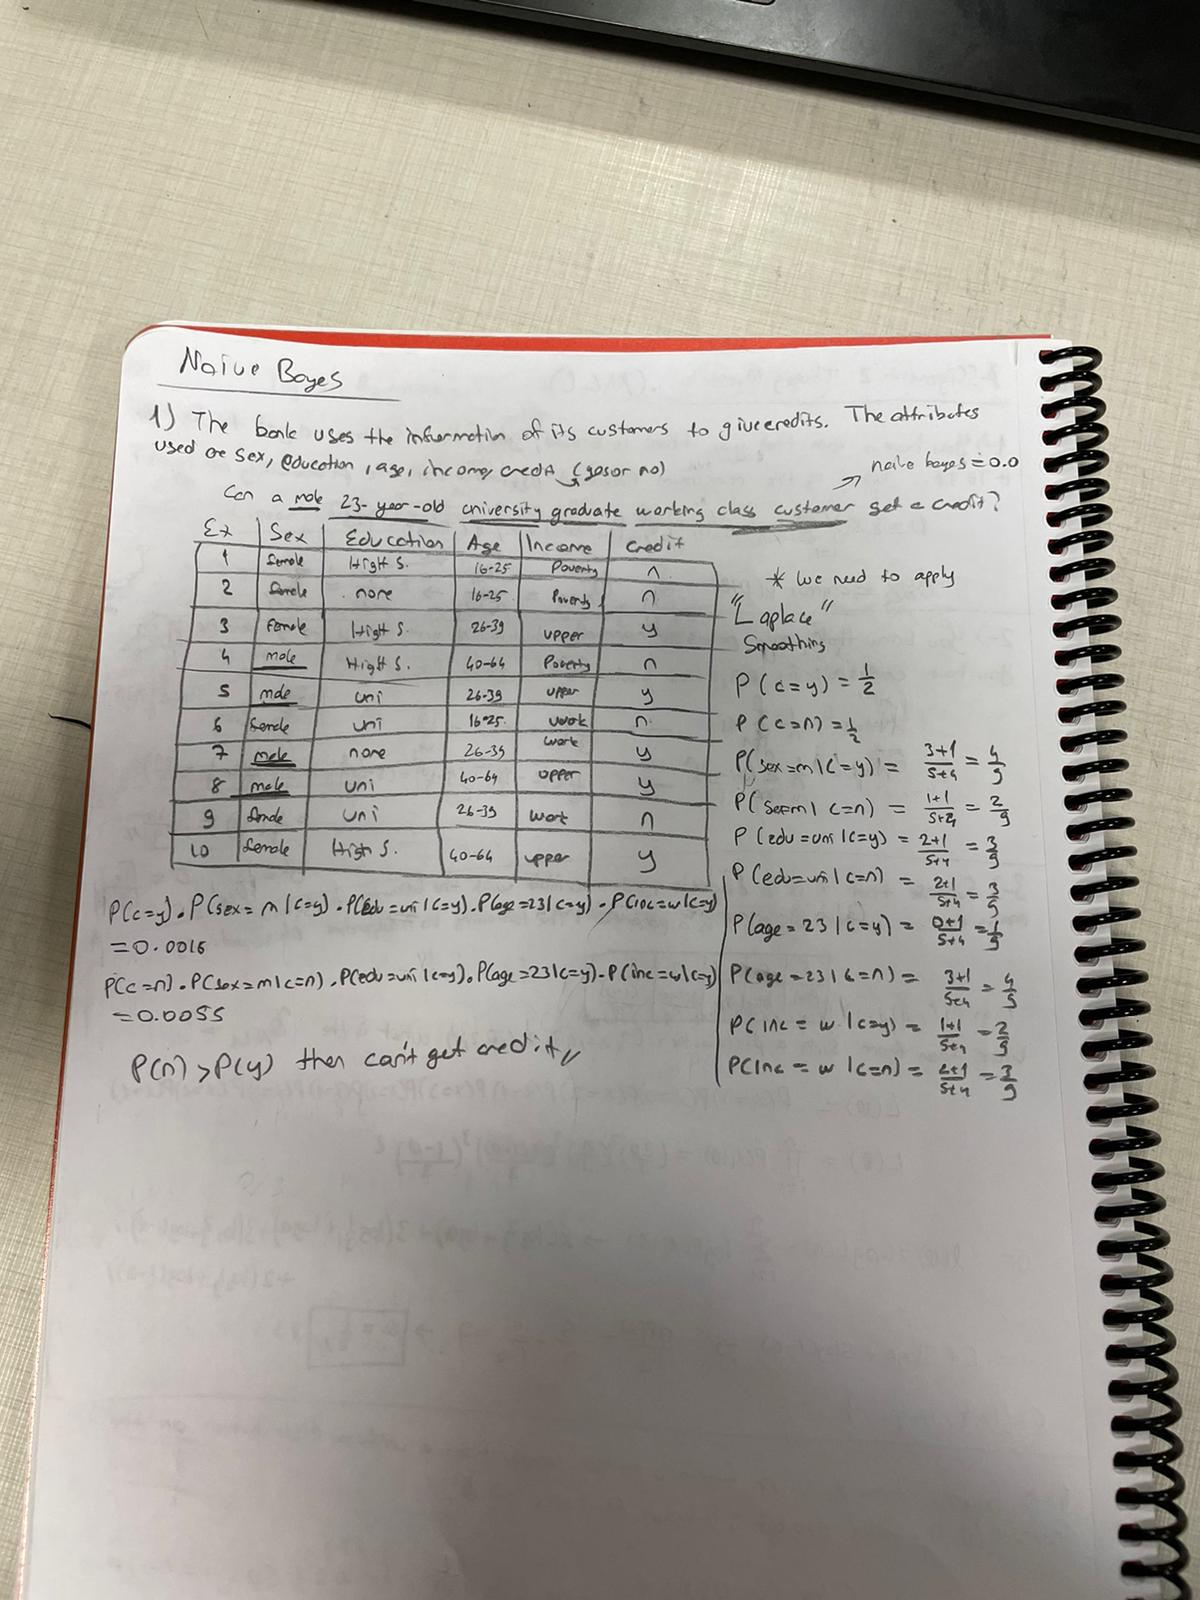

In [ ]:
Image('/content/fef5de9f-8b50-454c-8d7d-064659557759.jpeg',width = 900)

## Part II: Book Genre Classification with Naive Bayes


### Dataset Upload

Dataset uploaded from Drive or local

In [ ]:
from google.colab.patches import cv2_imshow

from google.colab import drive

#To read and connect drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

#I use this library according to pdf
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS 

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer

import re

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

import math

from collections import defaultdict

import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/books/book_dataset_a2.csv',delimiter="\t")
dfCleaned = pd.read_csv('/content/drive/MyDrive/books/book_dataset_a2.csv',delimiter="\t")

In [ ]:
#Here firstly I dropped the 3 columns that we do not need while implementing naive bayes
df = df.drop(['title', 'author','coverImg'], axis=1)
dfCleaned = dfCleaned.drop(['title', 'author','coverImg'], axis=1)


In [ ]:
"""
1. Understanding the data:
    Here I do some preprocessing stages I wrote explanation for every stage below. In this part I cleaned the data to make it ready for model. 
    I used this stage for 3 times one is for (Bow-unigram Yes), (Bow-bigram Yes) , (TF-IDF Yes)
"""
#Here I replaced the punctuations with ' ' cause in the cleaning part there must be deleted
df['description'] = df['description'].str.replace(r'[^\w\s]+', ' ') 
dfCleaned['description'] = dfCleaned['description'].str.replace(r'[^\w\s]+', ' ') 

#Here I delete the numbers in txt
df['description'] = df['description'].str.replace('\d+', '') 
dfCleaned['description'] = dfCleaned['description'].str.replace('\d+', '') 

#I made it lowercase because, while cleaning stop words we need to make them lower to much with stop words in library
df['description'] = df['description'].str.lower()
dfCleaned['description'] = dfCleaned['description'].str.lower()

#Just opened a list
stopWords = ()
 
# converting tuple to frozenset
stopWords = frozenset(ENGLISH_STOP_WORDS)

#From frozen list I made a list to clean stopWords
stopWords = list(stopWords)

#Here the stop word cleaning happens / also I made 2 dataframe one with stop words one without stop words
dfCleaned['description'] = dfCleaned['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopWords)])) 

#I deleted arabic words which I saw on the most common words
dfCleaned['description'] = dfCleaned['description'].str.replace('[^a-zA-Z\s]+', '', regex = True)

#Deleting the one letter which is in the txt after preprocessing
dfCleaned['description'] = dfCleaned['description'].str.replace(' \w ', ' ', regex = True) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':


In [ ]:
df

,description,genre
0,winning means fame and fortune losing means ce...,Young Adult
1,there is a door at the end of a silent corrido...,Fantasy
2,the unforgettable novel of a childhood in a sl...,Classics
3,alternate cover edition of isbn since its imme...,Classics
4,about three things i was absolutely positive \...,Young Adult
...,...,...
21074,when seventeen year old kara nightingale is su...,Fantasy
21075,lilah lopez dreser s in town to take care of u...,Romance
21076,anasazi sequel to the thirteenth chime by ...,Mystery
21077,readers favorite awards winner sixteen year ...,Fantasy


In [ ]:
dfCleaned

,description,genre
0,winning means fame fortune losing means certai...,Young Adult
1,door end silent corridor haunting harry pottte...,Fantasy
2,unforgettable novel childhood sleepy southern ...,Classics
3,alternate cover edition isbn immediate success...,Classics
4,things absolutely positive edward vampire seco...,Young Adult
...,...,...
21074,seventeen year old kara nightingale suddenly s...,Fantasy
21075,lilah lopez dreser town care unfinished family...,Romance
21076,anasazi sequel thirteenth chime emma michaels ...,Mystery
21077,readers favorite awards winner sixteen year ol...,Fantasy


In [ ]:
#This function makes a list with most 3 words used in txts
def mostCommonList(counts,genre,number):
  genreList = list()
  counter = number
  for i in range(len(counts)):
    if(genre == counts['genre'][i] and counter>0):
      genreList.append(counts['mostCommonWord'][i])
      counter -=1
  return genreList   

In [ ]:
#Here I implement my own list of words. 
counts = dfCleaned.set_index('genre')['description'].str.split().explode().groupby(level=0).apply(pd.value_counts)

counts = counts.to_frame()

counts = counts.reset_index()

counts = counts.rename(columns={'genre': 'genre', 'level_1': 'mostCommonWord','description': 'number'})

#As we see I collect all words with their frequencies for every genre class
counts

,genre,mostCommonWord,number
0,Classics,novel,368
1,Classics,story,342
2,Classics,life,330
3,Classics,new,288
4,Classics,love,244
...,...,...,...
194748,Young Adult,overalls,1
194749,Young Adult,morals,1
194750,Young Adult,ketty,1
194751,Young Adult,knockoff,1


In [ ]:
#Here I can pick any number of most common words from the related genre. Mystery and fantasy list has 10 words according to pdf
Young_Adult = mostCommonList(counts,'Young Adult',3)
Fantasy = mostCommonList(counts,'Fantasy',10)
Classics = mostCommonList(counts,'Classics',3)
Science_Fiction = mostCommonList(counts,'Science Fiction',3)
Fiction = mostCommonList(counts,'Fiction',3)
Horror = mostCommonList(counts,'Horror',3)
Romance = mostCommonList(counts,'Romance',3)
Mystery = mostCommonList(counts,'Mystery',10)
History = mostCommonList(counts,'History',3)
Thriller = mostCommonList(counts,'Thriller',3) 

In [ ]:
# 4. Modul Analysis ----> b) Stop Words
# Now, list the 10 non-stop words that most strongly predict that the book genre is ’Fantasy’
#and the 10 non-stop words that most strongly predict that the book genre is ’Mystery
print(Mystery,Fantasy)

['new', 'murder', 'life', 'killer', 'case', 'man', 'mystery', 'old', 'detective', 'family'] ['world', 'new', 'life', 'magic', 'time', 'power', 'old', 'book', 'dark', 'love']


In [ ]:
# Here arrenging the every text 
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
df.description = df.description.apply(lemmatize_text)

In [ ]:
#Fitting the model and grouping the data
def fit(x, y, labels):
    n_label_items = {}
    log_label_priors = {}
    n = len(x)
    data = {}
    for l in labels:
        data[l] = x[np.where(y == l)]
    grouped_data = data
    
    for l, data in grouped_data.items():
        n_label_items[l] = len(data)
        log_label_priors[l] = math.log(n_label_items[l] / n)
    return n_label_items, log_label_priors

In [ ]:
#Predicting after fitting the data
def predict(n_label_items, vocab, word_counts, log_label_priors, labels, x):
    result = []
    for text in x:
        label_scores = {l: log_label_priors[l] for l in labels}
        words = set(w_tokenizer.tokenize(text))
        for word in words:
            if word not in vocab: continue
            for l in labels:
                #laplace smoothing
                a = word_counts[l][word] + 1
                b = n_label_items[l] + len(vocab)
                log_w_given_l = math.log(a/b)
                label_scores[l] += log_w_given_l
        result.append(max(label_scores, key=label_scores.get))
    return result

In [ ]:
#Here with clean data BOW-unigram without stop words+
Xdata = dfCleaned['description'].values
Ydata = dfCleaned['genre'].values

encoder = LabelEncoder()

Ydata = encoder.fit_transform(Ydata)


X_train, X_test, y_train, y_test = train_test_split(Xdata,Ydata, test_size=0.2, random_state=42) 

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(X_train)  
vocabArray = vectorizer.get_feature_names() 

X = X.toarray()

word_counts = {}
for l in range(10):
    word_counts[l] = defaultdict(lambda: 0)
for i in range(X.shape[0]):
    l = y_train[i]
    for j in range(len(vocabArray)):
        word_counts[l][vocabArray[j]] += X[i][j]

labels = [0,1,2,3,4,5,6,7,8,9] 
n_label_items, log_label_priors = fit(X_train,y_train,labels)
pred = predict(n_label_items, vocabArray, word_counts, log_label_priors, labels, X_test)
print("Accuracy of prediction on test set : ", accuracy_score(y_test,pred))

Accuracy of prediction on test set :  0.4781783681214421


In [ ]:
#------------------------------------------------------#

In [ ]:
#Here with uncleaned data with stop words  BOW unigram

Xdata2 = df['description'].values
Ydata2 = df['genre'].values

encoder = LabelEncoder()

Ydata2 = encoder.fit_transform(Ydata2)


X_train, X_test, y_train, y_test = train_test_split(Xdata2,Ydata2, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()

X2 = vectorizer.fit_transform(X_train)  

vocabArray = vectorizer.get_feature_names() 

X2 = X2.toarray()

word_counts = {}
for l in range(10):
    word_counts[l] = defaultdict(lambda: 0)
for i in range(X2.shape[0]):
    l = y_train[i]
    for j in range(len(vocabArray)):
        word_counts[l][vocabArray[j]] += X2[i][j]

labels = [0,1,2,3,4,5,6,7,8,9] 
n_label_items, log_label_priors = fit(X_train,y_train,labels)
pred = predict(n_label_items, vocabArray, word_counts, log_label_priors, labels, X_test)
print("Accuracy of prediction on test set : ", accuracy_score(y_test,pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Accuracy of prediction on test set :  0.45920303605313095


In [ ]:
#------------------------------------------------------# BOW - bigram with stop words

In [ ]:
df_sample=df.drop(df.index[8000:])

In [ ]:
Xdata3 = df_sample['description'].values
Ydata3 = df_sample['genre'].values

encoder = LabelEncoder()

Ydata3 = encoder.fit_transform(Ydata3)


X_train, X_test, y_train, y_test = train_test_split(Xdata3,Ydata3, test_size=0.2, random_state=42)


vectorizer = CountVectorizer(ngram_range=(2,2),min_df = 3)

X3 = vectorizer.fit_transform(X_train)  

vocabArray = vectorizer.get_feature_names() 

X3 = X3.toarray()

word_counts = {}
for l in range(10):
    word_counts[l] = defaultdict(lambda: 0)
for i in range(X3.shape[0]):
    l = y_train[i]
    for j in range(len(vocabArray)):
        word_counts[l][vocabArray[j]] += X3[i][j]

labels = [0,1,2,3,4,5,6,7,8,9] 
n_label_items, log_label_priors = fit(X_train,y_train,labels)
pred = predict(n_label_items, vocabArray, word_counts, log_label_priors, labels, X_test)
print("Accuracy of prediction on test set : ", accuracy_score(y_test,pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Accuracy of prediction on test set :  0.233125


In [ ]:
#------------------------------------------------------# BOW bigram without stop words

In [ ]:
df_sampleCleaned=dfCleaned.drop(dfCleaned.index[8000:])

Xdata4 = df_sampleCleaned['description'].values
Ydata4 = df_sampleCleaned['genre'].values

encoder = LabelEncoder()

Ydata4 = encoder.fit_transform(Ydata4)


X_train, X_test, y_train, y_test = train_test_split(Xdata4,Ydata4, test_size=0.2, random_state=42)

vectorizer = CountVectorizer(ngram_range=(2,2),min_df = 3)

X4 = vectorizer.fit_transform(X_train)  

vocabArray = vectorizer.get_feature_names() 

X4 = X4.toarray()

word_counts = {}
for l in range(10):
    word_counts[l] = defaultdict(lambda: 0)
for i in range(X4.shape[0]):
    l = y_train[i]
    for j in range(len(vocabArray)):
        word_counts[l][vocabArray[j]] += X4[i][j]

labels = [0,1,2,3,4,5,6,7,8,9] 
n_label_items, log_label_priors = fit(X_train,y_train,labels)
pred = predict(n_label_items, vocabArray, word_counts, log_label_priors, labels, X_test)
print("Accuracy of prediction on test set : ", accuracy_score(y_test,pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Accuracy of prediction on test set :  0.233125


In [ ]:
#------------------------------------------------------# TF-IDF with stop words

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
Xdata5 = df['description'].values
Ydata5 = df['genre'].values

encoder = LabelEncoder()

Ydata5 = encoder.fit_transform(Ydata5)


X_train, X_test, y_train, y_test = train_test_split(Xdata5,Ydata5, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()

X5 = vectorizer.fit_transform(X_train)  

vocabArray = vectorizer.get_feature_names() 

X5 = X5.toarray()

word_counts = {}
for l in range(10):
    word_counts[l] = defaultdict(lambda: 0)
for i in range(X5.shape[0]):
    l = y_train[i]
    for j in range(len(vocabArray)):
        word_counts[l][vocabArray[j]] += X5[i][j]

labels = [0,1,2,3,4,5,6,7,8,9] 
n_label_items, log_label_priors = fit(X_train,y_train,labels)
pred = predict(n_label_items, vocabArray, word_counts, log_label_priors, labels, X_test)
print("Accuracy of prediction on test set : ", accuracy_score(y_test,pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Accuracy of prediction on test set :  0.43975332068311196


In [ ]:
#------------------------------------------------------# TF-IDF without stop words

In [ ]:
Xdata6 = dfCleaned['description'].values
Ydata6 = dfCleaned['genre'].values

encoder = LabelEncoder()

Ydata6 = encoder.fit_transform(Ydata6)

X_train, X_test, y_train, y_test = train_test_split(Xdata6,Ydata6, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()

X6 = vectorizer.fit_transform(X_train)  

vocabArray = vectorizer.get_feature_names() 

X6 = X6.toarray()

word_counts = {}
for l in range(10):
    word_counts[l] = defaultdict(lambda: 0)
for i in range(X6.shape[0]):
    l = y_train[i]
    for j in range(len(vocabArray)):
        word_counts[l][vocabArray[j]] += X6[i][j]

labels = [0,1,2,3,4,5,6,7,8,9] 

n_label_items, log_label_priors = fit(X_train,y_train,labels)
pred = predict(n_label_items, vocabArray, word_counts, log_label_priors, labels, X_test)
print("Accuracy of prediction on test set : ", accuracy_score(y_test,pred))

Accuracy of prediction on test set :  0.4831593927893738


In [ ]:
vectorizer = TfidfVectorizer()

genredf = dfCleaned['genre'].unique()
genreDict = {}

print("List the 10 words whose presence most strongly predicts the genre of the book")

for genre in genredf:
  df_genre = dfCleaned.loc[dfCleaned['genre'] == genre]
  tfidf = vectorizer.fit_transform(df_genre['description'])
  genreDict[genre] = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names_out())

  print("genre: ",genre)
  print(genreDict[genre].sum().sort_values(ascending = False).head(10))

print("List the 10 words whose absence most strongly predicts the genre of the book.")
for genre in genredf:
  print("genre: ",genre)
  print(genreDict[genre].sum().sort_values(ascending = True).head(10))

#Comparing the influence of presence vs absence of words on predicting the book’s genre:
"""
  The presence words are that the important to predict the genre of book because they are the most common one's
  The absence words that are the not important while predicting the book's genre beacuse their probability or weights low.
"""

List the 10 words whose presence most strongly predicts the genre of the book
genre:  Young Adult
life       58.270462
new        54.824948
love       48.073047
school     46.176564
world      44.708553
just       39.508164
girl       38.598680
year       37.813246
friends    36.041964
time       35.880919
dtype: float64
genre:  Fantasy
world     95.111686
new       76.752476
magic     69.050055
life      68.372167
time      62.164102
power     49.391568
king      48.945038
book      48.829467
series    47.763158
dark      47.473996
dtype: float64
genre:  Classics
novel      16.551448
story      16.162996
life       15.137923
new        14.187331
love       13.164480
world      12.817884
young      11.591742
edition    11.344522
stories    11.160772
tale       10.762718
dtype: float64
genre:  Science Fiction
world      25.222075
earth      24.478164
planet     21.755504
new        20.598240
human      19.729934
life       18.512430
time       18.274081
war        16.717272
science    1

In [ ]:
#Error Analyse:
"""
  In this assignment, there was a long preprocessing stage that I deleted many words from texts. When I looked the texts there was numbers, some punctiations, etc. If we thing about that,
the model has low accuracy because of the structure of texts'. Some arabic words, abbreviations make it hard to fit and predict the correct genre. Also, some genres are very close to each other,
they have same most common words and this the second reason why its hard to predict correct genre. 
"""

In [ ]:
#Analysing effect of stop words:
"""
  Deleting stop words make the prediction easier because of that we should make smooth text before fitting the model. If we do not delete the stop words we have more words that the probability calculation would be hard.
Also, after deleting stop words, we should delete the punctiations, some words in other language, etc. 

"""